In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from json import loads
import sys

sys.path.append("../")
from reef.plot import stack_images, plot_sample

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_dir = Path("../../data/raw")
images_dir = data_dir / "train_images"

In [3]:
df_train = pd.read_csv(data_dir / 'train.csv')
df_train['path'] = 'video_' + df_train.video_id.astype(str) + '/' + df_train.video_frame.astype(str) + '.jpg'
df_train['path'] = df_train.path.map(lambda x: (images_dir / x).as_posix())
df_train['annotations'] = df_train.annotations.map(lambda x: loads(x.replace("'", '"')))
df_train

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,path
0,0,40258,0,0,0-0,[],../../data/raw/train_images/video_0/0.jpg
1,0,40258,1,1,0-1,[],../../data/raw/train_images/video_0/1.jpg
2,0,40258,2,2,0-2,[],../../data/raw/train_images/video_0/2.jpg
3,0,40258,3,3,0-3,[],../../data/raw/train_images/video_0/3.jpg
4,0,40258,4,4,0-4,[],../../data/raw/train_images/video_0/4.jpg
...,...,...,...,...,...,...,...
23496,2,29859,10755,2983,2-10755,[],../../data/raw/train_images/video_2/10755.jpg
23497,2,29859,10756,2984,2-10756,[],../../data/raw/train_images/video_2/10756.jpg
23498,2,29859,10757,2985,2-10757,[],../../data/raw/train_images/video_2/10757.jpg
23499,2,29859,10758,2986,2-10758,[],../../data/raw/train_images/video_2/10758.jpg


<AxesSubplot:>

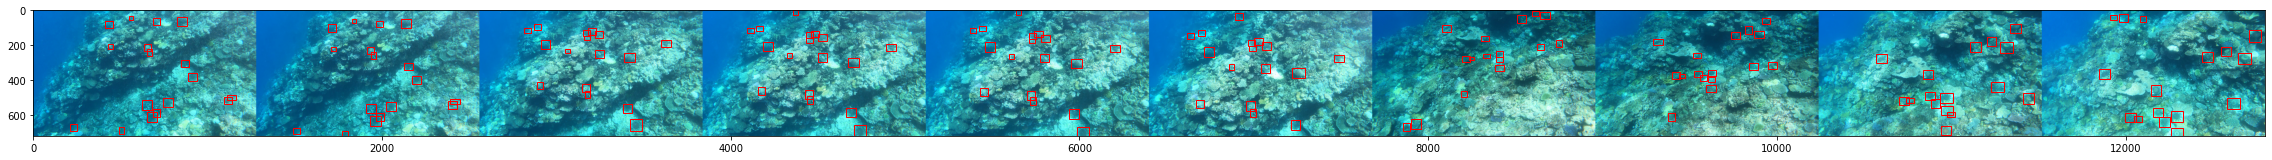

In [13]:
# sample_seq = df_train.iloc[20:30]
sample_seq = df_train[df_train.annotations.map(len) > 15].sample(10).sort_values('image_id')

stacked_image, stacked_bbox = stack_images(
    sample_seq.path, 
    sample_seq.annotations, 
    axis="width"
)

fig, ax = plt.subplots(figsize=(4 * 10, 4))
# fig, ax = plt.subplots(figsize=(4, 4 * 10))

plot_sample(ax, stacked_image, stacked_bbox)

In [15]:
sample_seq

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,path
12668,1,60754,9103,687,1-9103,"[{'x': 492, 'y': 670, 'width': 30, 'height': 3...",../../data/raw/train_images/video_1/9103.jpg
12669,1,60754,9104,688,1-9104,"[{'x': 493, 'y': 691, 'width': 30, 'height': 2...",../../data/raw/train_images/video_1/9104.jpg
12693,1,60754,9128,712,1-9128,"[{'x': 586, 'y': 420, 'width': 45, 'height': 5...",../../data/raw/train_images/video_1/9128.jpg
12696,1,60754,9131,715,1-9131,"[{'x': 584, 'y': 454, 'width': 47, 'height': 5...",../../data/raw/train_images/video_1/9131.jpg
12697,1,60754,9132,716,1-9132,"[{'x': 579, 'y': 462, 'width': 47, 'height': 5...",../../data/raw/train_images/video_1/9132.jpg
12701,1,60754,9136,720,1-9136,"[{'x': 495, 'y': 16, 'width': 43, 'height': 37...",../../data/raw/train_images/video_1/9136.jpg
19637,2,22643,5735,372,2-5735,"[{'x': 624, 'y': 145, 'width': 45, 'height': 3...",../../data/raw/train_images/video_2/5735.jpg
19643,2,22643,5741,378,2-5741,"[{'x': 559, 'y': 242, 'width': 45, 'height': 3...",../../data/raw/train_images/video_2/5741.jpg
19666,2,22643,5764,401,2-5764,"[{'x': 597, 'y': 341, 'width': 59, 'height': 5...",../../data/raw/train_images/video_2/5764.jpg
19676,2,22643,5774,411,2-5774,"[{'x': 626, 'y': 428, 'width': 58, 'height': 6...",../../data/raw/train_images/video_2/5774.jpg
